ADHD Data Analysis Notebook

Objective: This notebook conducts an in-depth exploratory analysis of ADHD diagnosis data, ensuring the dataset is clean, structured, and ready for subsequent modeling.

Dataset Description:

- **`METADATA_A.xlsx`:** Contains socio-demographic information.  
- **`METADATA_B.xlsx`:** Provides supplementary demographic data.  
- **`LABELS.xlsx`:** Includes ADHD diagnosis and gender details.  
- **`Functional_Connectome.csv`:** Contains brain connectivity matrices.

In [2]:
#Load Necessary Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [35]:
# ================================================
# Define Output Directory
# ================================================
output_dir = r"/Users/kaushikvijayakumar/Desktop/output"
os.makedirs(output_dir, exist_ok=True)

# ================================================
# Load Each Dataset
# ================================================
metadata_a = pd.read_excel(r"/Users/kaushikvijayakumar/Desktop/METADATA_A.xlsx")
metadata_b = pd.read_excel(r"/Users/kaushikvijayakumar/Desktop/METADATA_B.xlsx")
labels = pd.read_excel(r"/Users/kaushikvijayakumar/Downloads/ce888_data_2025/Data/LABELS.xlsx")
connectome_data = pd.read_csv(r"/Users/kaushikvijayakumar/Downloads/ce888_data_2025/Data/FUNCTIONAL_CONNECTOME_MATRICES.csv")
print("METADATA_A loaded. Shape:", metadata_a.shape)
print("METADATA_B loaded. Shape:", metadata_b.shape)
print("Labels loaded. Shape:", labels.shape)
print("Functional Connectome Data loaded. Shape:", connectome_data.shape)

# --------------------------------------------
# Show null value counts for each raw dataset
# --------------------------------------------
print("\n--- Null values in METADATA_A ---")
print(metadata_a.isnull().sum())
print("\n--- Null values in METADATA_B ---")
print(metadata_b.isnull().sum())
print("\n--- Null values in Labels ---")
print(labels.isnull().sum())
print("\n--- Null values in Functional Connectome Data ---")
print(connectome_data.isnull().sum())

METADATA_A loaded. Shape: (1213, 19)
METADATA_B loaded. Shape: (1213, 10)
Labels loaded. Shape: (1213, 3)
Functional Connectome Data loaded. Shape: (1213, 19901)

--- Null values in METADATA_A ---
participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64

--- Null values in METADATA_B ---
participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site         

In [48]:
#Display dataset information
def dataset_info(df, name):
    print(f" {name} Dataset Information:\n")
    display(pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes,
        "Missing Values": df.isnull().sum()
    }))
    print("\n--------------\n")

dataset_info(metadata_a, "Metadata A")
dataset_info(metadata_b, "Metadata B")
dataset_info(labels, "Labels")
dataset_info(connectome_data, "Functional Connectome")

 Metadata A Dataset Information:



,Column Name,Data Type,Missing Values
participant_id,participant_id,object,0
EHQ_EHQ_Total,EHQ_EHQ_Total,float64,0
ColorVision_CV_Score,ColorVision_CV_Score,int64,0
APQ_P_APQ_P_CP,APQ_P_APQ_P_CP,int64,0
APQ_P_APQ_P_ID,APQ_P_APQ_P_ID,int64,0
APQ_P_APQ_P_INV,APQ_P_APQ_P_INV,int64,0
APQ_P_APQ_P_OPD,APQ_P_APQ_P_OPD,int64,0
APQ_P_APQ_P_PM,APQ_P_APQ_P_PM,int64,0
APQ_P_APQ_P_PP,APQ_P_APQ_P_PP,int64,0
SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Conduct_Problems,int64,0



--------------

 Metadata B Dataset Information:



,Column Name,Data Type,Missing Values
participant_id,participant_id,object,0
Basic_Demos_Enroll_Year,Basic_Demos_Enroll_Year,int64,0
Basic_Demos_Study_Site,Basic_Demos_Study_Site,int64,0
PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Ethnicity,float64,11
PreInt_Demos_Fam_Child_Race,PreInt_Demos_Fam_Child_Race,int64,0
MRI_Track_Scan_Location,MRI_Track_Scan_Location,int64,0
Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Edu,int64,0
Barratt_Barratt_P1_Occ,Barratt_Barratt_P1_Occ,int64,0
Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Edu,int64,0
Barratt_Barratt_P2_Occ,Barratt_Barratt_P2_Occ,int64,0



--------------

 Labels Dataset Information:



,Column Name,Data Type,Missing Values
participant_id,participant_id,object,0
ADHD_Outcome,ADHD_Outcome,int64,0
Sex_F,Sex_F,int64,0



--------------

 Functional Connectome Dataset Information:



,Column Name,Data Type,Missing Values
participant_id,participant_id,object,0
0throw_1thcolumn,0throw_1thcolumn,float64,0
0throw_2thcolumn,0throw_2thcolumn,float64,0
0throw_3thcolumn,0throw_3thcolumn,float64,0
0throw_4thcolumn,0throw_4thcolumn,float64,0
...,...,...,...
196throw_198thcolumn,196throw_198thcolumn,float64,0
196throw_199thcolumn,196throw_199thcolumn,float64,0
197throw_198thcolumn,197throw_198thcolumn,float64,0
197throw_199thcolumn,197throw_199thcolumn,float64,0



--------------



Dataset: METADATA_A
Shape: (1213, 19)

Summary Statistics:
       participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
count            1213    1213.000000           1213.000000     1213.000000   
unique           1213            NaN                   NaN             NaN   
top      UmrK0vMLopoR            NaN                   NaN             NaN   
freq                1            NaN                   NaN             NaN   
mean              NaN      58.876917             13.164880        3.781533   
std               NaN      49.855501              2.780624        1.376700   
min               NaN    -100.000000              0.000000        0.000000   
25%               NaN      45.600000             14.000000        3.000000   
50%               NaN      76.670000             14.000000        3.000000   
75%               NaN      93.400000             14.000000        4.000000   
max               NaN     100.000000             14.000000       12.000000   

    

<Figure size 1500x1000 with 0 Axes>

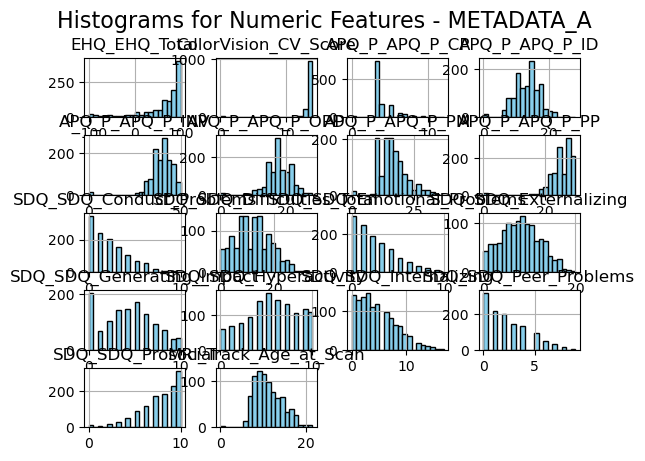

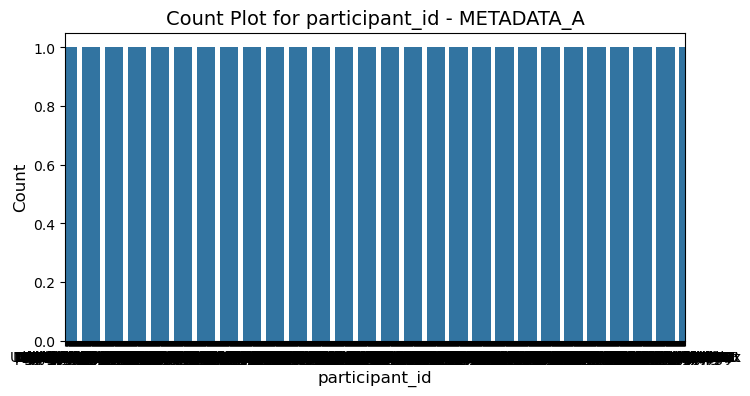

Dataset: METADATA_B
Shape: (1213, 10)

Summary Statistics:
       participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
count            1213              1213.000000             1213.000000   
unique           1213                      NaN                     NaN   
top      UmrK0vMLopoR                      NaN                     NaN   
freq                1                      NaN                     NaN   
mean              NaN              2017.652102                2.014839   
std               NaN                 1.122522                1.135147   
min               NaN              2015.000000                1.000000   
25%               NaN              2017.000000                1.000000   
50%               NaN              2018.000000                1.000000   
75%               NaN              2019.000000                3.000000   
max               NaN              2020.000000                4.000000   

        PreInt_Demos_Fam_Child_Ethnicity  PreInt_Dem

<Figure size 1500x1000 with 0 Axes>

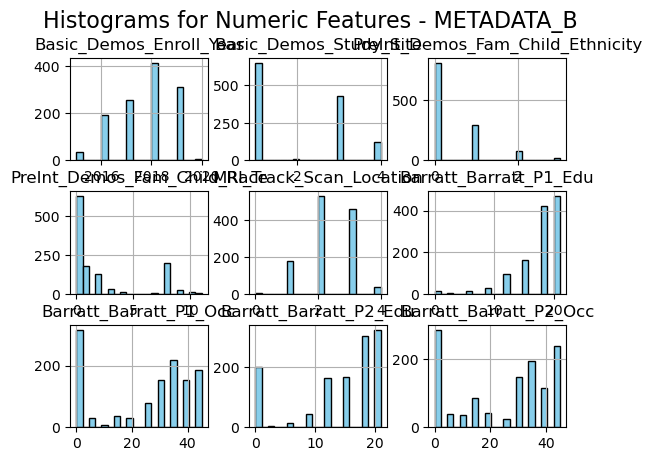

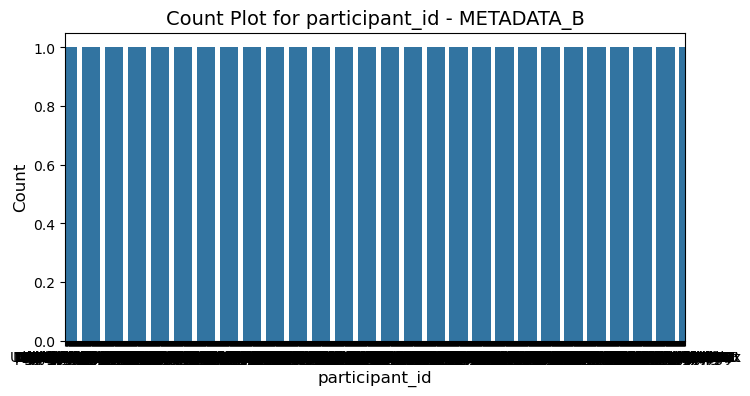

Dataset: LABELS
Shape: (1213, 3)

Summary Statistics:
       participant_id  ADHD_Outcome        Sex_F
count            1213   1213.000000  1213.000000
unique           1213           NaN          NaN
top      UmrK0vMLopoR           NaN          NaN
freq                1           NaN          NaN
mean              NaN      0.685078     0.342951
std               NaN      0.464676     0.474891
min               NaN      0.000000     0.000000
25%               NaN      0.000000     0.000000
50%               NaN      1.000000     0.000000
75%               NaN      1.000000     1.000000
max               NaN      1.000000     1.000000

Null Value Counts:
participant_id    0
ADHD_Outcome      0
Sex_F             0
dtype: int64




<Figure size 1500x1000 with 0 Axes>

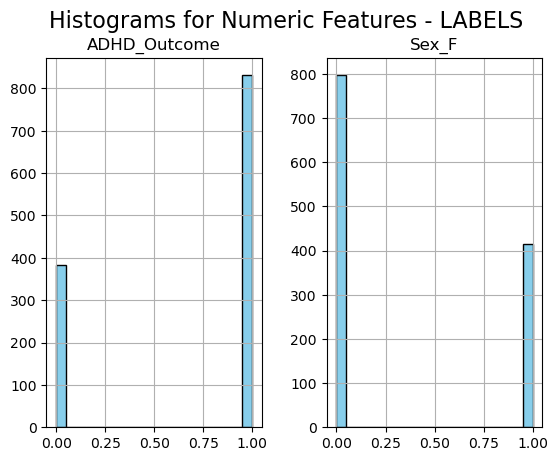

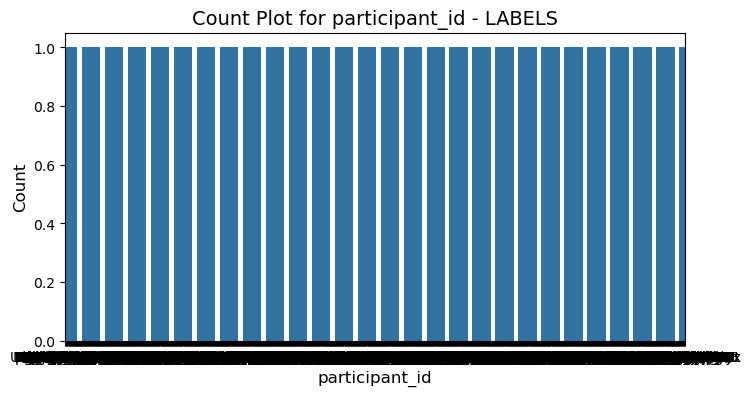

In [6]:
datasets = {
    "METADATA_A": metadata_a,
    "METADATA_B": metadata_b,
    "LABELS": labels,
    
}
for name, df in datasets.items():
    print("=" * 50)
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print("\nSummary Statistics:")
    print(df.describe(include='all'))
    print("\nNull Value Counts:")
    print(df.isnull().sum())
    print("\n" + "=" * 50 + "\n")
    
    # Histograms for Numeric Features (if any)
    num_cols = df.select_dtypes(include=['number']).columns
    if len(num_cols) > 0:
        plt.figure(figsize=(15, 10))
        df[num_cols].hist(bins=20, color='skyblue', edgecolor='black')
        plt.suptitle(f"Histograms for Numeric Features - {name}", fontsize=16)
        
        plt.show()
    
    # Count Plots for Categorical Features (if any)
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        for col in cat_cols:
            plt.figure(figsize=(8, 4))
            sns.countplot(data=df, x=col)
            plt.title(f"Count Plot for {col} - {name}", fontsize=14)
            plt.xlabel(col, fontsize=12)
            plt.ylabel("Count", fontsize=12)
           # plt.tight_layout()
            plt.show()

In [8]:
# ================================================
#  Merge the Datasets
# ================================================
# Merge Metadata A and Metadata B on 'participant_id'
merged_metadata = pd.merge(metadata_a, metadata_b, on="participant_id", how="outer")
print("\nMerged Metadata A and B. Shape:", merged_metadata.shape)

# Merge the combined metadata with Labels on 'participant_id'
merged_meta_labels = pd.merge(merged_metadata, labels, on="participant_id", how="outer")
print("Merged Metadata with Labels. Shape:", merged_meta_labels.shape)

# For connectivity data: keep only subjects that exist in Labels
matched_subjects = set(connectome_data["participant_id"]).intersection(set(labels["participant_id"]))
print(f"\nNumber of subjects matched between Functional Connectome and Labels: {len(matched_subjects)}")
connectome_data = connectome_data[connectome_data["participant_id"].isin(labels["participant_id"])]

# Merge connectivity data with Labels on 'participant_id'
merged_connectome_labels = pd.merge(connectome_data, labels, on="participant_id", how="left")
print("Merged Functional Connectome Data with Labels. Shape:", merged_connectome_labels.shape)

# Merge all datasets together (Metadata + Labels + Connectome)
full_data = pd.merge(merged_meta_labels, connectome_data, on="participant_id", how="outer")
print("Final merged dataset (all sources). Shape:", full_data.shape)

# Save merged data
full_data_path = os.path.join(output_dir, "full_merged_data.csv")
full_data.to_csv(full_data_path, index=False)
print("Merged data saved to", full_data_path)


Merged Metadata A and B. Shape: (1213, 28)
Merged Metadata with Labels. Shape: (1213, 30)

Number of subjects matched between Functional Connectome and Labels: 1213
Merged Functional Connectome Data with Labels. Shape: (1213, 19903)
Final merged dataset (all sources). Shape: (1213, 19930)
Merged data saved to /Users/kaushikvijayakumar/Desktop/test/full_merged_data.csv


In [14]:
# ================================================
#  Clean the Data
# ================================================
cleaned_data = full_data.copy()

#  Handle Missing Values
numeric_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = cleaned_data.select_dtypes(include=['object', 'category']).columns

# Impute numeric columns with median
for col in numeric_cols:
    cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].median())

# Impute categorical columns with mode
for col in categorical_cols:
    if cleaned_data[col].isnull().sum() > 0:
        cleaned_data[col] = cleaned_data[col].fillna(cleaned_data[col].mode()[0])

#  Remove Duplicates 
duplicates = cleaned_data.duplicated().sum()
print("\nNumber of duplicate rows BEFORE removal:", duplicates)
cleaned_data.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", cleaned_data.shape)

#  Ensure Correct Data Types 
if "gender" in cleaned_data.columns:
    cleaned_data["gender"] = cleaned_data["gender"].astype('category')

# Show null values AFTER cleaning
print("\n--- Null values in Cleaned Data AFTER cleaning ---")
print(cleaned_data.isnull().sum())

# Save cleaned data
cleaned_data_path = os.path.join(output_dir, "cleaned_data.csv")
cleaned_data.to_csv(cleaned_data_path, index=False)
print("Cleaned data saved to", cleaned_data_path)


Number of duplicate rows BEFORE removal: 0
Shape after dropping duplicates: (1213, 19930)

--- Null values in Cleaned Data AFTER cleaning ---
participant_id          0
EHQ_EHQ_Total           0
ColorVision_CV_Score    0
APQ_P_APQ_P_CP          0
APQ_P_APQ_P_ID          0
                       ..
196throw_198thcolumn    0
196throw_199thcolumn    0
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
Length: 19930, dtype: int64
Cleaned data saved to /Users/kaushikvijayakumar/Desktop/test/cleaned_data.csv


In [16]:
print("\n=== Final EDA on Cleaned Data ===")

# Summary statistics
print("\nCleaned Data Summary (Numeric):")
print(cleaned_data.describe())

print("\nCleaned Data Summary (All Columns):")
print(cleaned_data.describe(include='all'))



=== Final EDA on Cleaned Data ===

Cleaned Data Summary (Numeric):
       EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
count    1213.000000           1213.000000     1213.000000     1213.000000   
mean       58.876917             13.164880        3.781533       13.205276   
std        49.855501              2.780624        1.376700        3.811772   
min      -100.000000              0.000000        0.000000        0.000000   
25%        45.600000             14.000000        3.000000       11.000000   
50%        76.670000             14.000000        3.000000       13.000000   
75%        93.400000             14.000000        4.000000       16.000000   
max       100.000000             14.000000       12.000000       28.000000   

       APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
count      1213.000000      1213.000000     1213.000000     1213.000000   
mean         39.374279        17.785655       16.393240       25.246496   
std 


Summary Statistics for Cleaned Data:
       participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
count            1213    1213.000000           1213.000000     1213.000000   
unique           1213            NaN                   NaN             NaN   
top      00aIpNTbG5uh            NaN                   NaN             NaN   
freq                1            NaN                   NaN             NaN   
mean              NaN      58.876917             13.164880        3.781533   
std               NaN      49.855501              2.780624        1.376700   
min               NaN    -100.000000              0.000000        0.000000   
25%               NaN      45.600000             14.000000        3.000000   
50%               NaN      76.670000             14.000000        3.000000   
75%               NaN      93.400000             14.000000        4.000000   
max               NaN     100.000000             14.000000       12.000000   

        APQ_P_APQ_P_ID  A

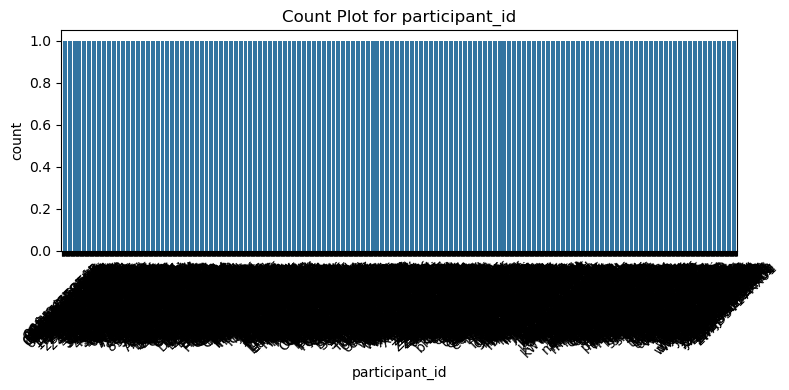

Count plot for participant_id saved to /Users/kaushikvijayakumar/Desktop/test/countplot_participant_id.png
Cleaned data saved to /Users/kaushikvijayakumar/Desktop/test/cleaned_data.csv


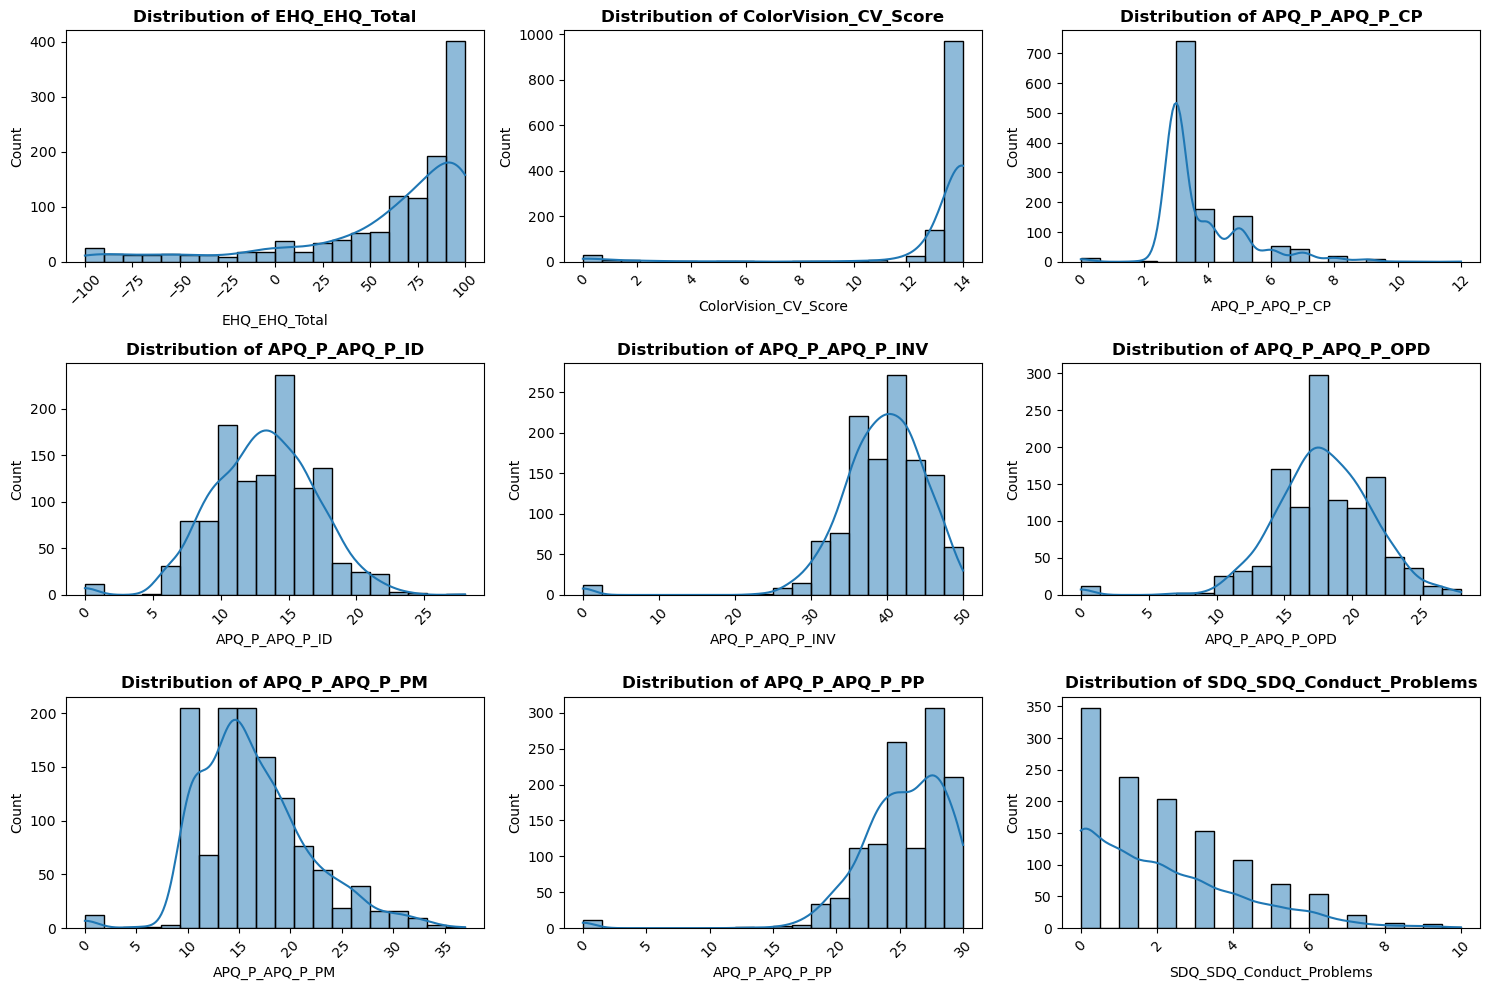

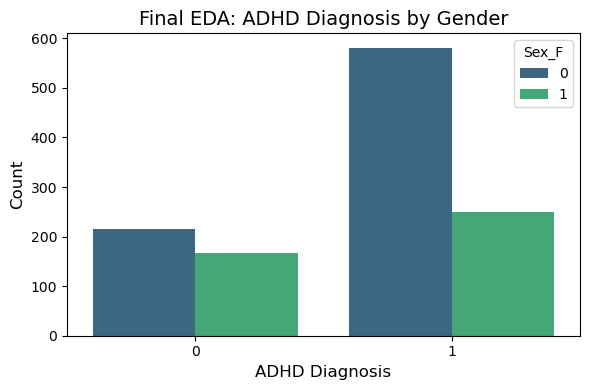

In [18]:
# ================================================
#  Exploratory Data Analysis (EDA)
# ================================================
# Print summary statistics
print("\nSummary Statistics for Cleaned Data:")
print(cleaned_data.describe(include='all'))

# Count plots for categorical variables
cat_cols = cleaned_data.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cleaned_data, x=col)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    eda_plot_path = os.path.join(output_dir, f"countplot_{col}.png")
    plt.savefig(eda_plot_path)
    plt.show()
    print(f"Count plot for {col} saved to {eda_plot_path}")
print("Cleaned data saved to", cleaned_data_path)

# Create a histograms for all numeric columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
numeric_columns = cleaned_data.select_dtypes(include=["number"]).columns

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.histplot(cleaned_data[col], bins=20, kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Using default tight_layout to avoid warnings
plt.show()

# ADHD Diagnosis by Sex_F 

if "ADHD_Outcome" in cleaned_data.columns and "Sex_F" in cleaned_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cleaned_data, x="ADHD_Outcome", hue="Sex_F", palette="viridis")
    plt.title("Final EDA: ADHD Diagnosis by Gender", fontsize=14)
    plt.xlabel("ADHD Diagnosis", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()



In [22]:
# ================================================
#  Preprocess the data
# ================================================
# Encode target variable (ADHD_Outcome) 
if cleaned_data["ADHD_Outcome"].dtype == 'object' or cleaned_data["ADHD_Outcome"].dtype.name == 'category':
    label_encoder = LabelEncoder()
    cleaned_data["ADHD_Label_Encoded"] = label_encoder.fit_transform(cleaned_data["ADHD_Outcome"])
    print("\nADHD_Label classes:", label_encoder.classes_)

# Exclude the target from scaling
numeric_cols_for_scaling = [col for col in numeric_cols if col != "ADHD_Outcome"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cleaned_data[numeric_cols_for_scaling])
scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols_for_scaling, index=cleaned_data.index)

# Update numeric columns with scaled values
for col in numeric_cols_for_scaling:
    cleaned_data[col] = scaled_df[col]

# Save preprocessed data
preprocessed_data_path = os.path.join(output_dir, "preprocessed_data.csv")
cleaned_data.to_csv(preprocessed_data_path, index=False)
print("Preprocessed data saved to", preprocessed_data_path)

Preprocessed data saved to /Users/kaushikvijayakumar/Desktop/test/preprocessed_data.csv


In [24]:
# ================================================
#  Split the Data into Training and Test Sets
# ================================================
# Define features and target
drop_columns = ['participant_id', 'ADHD_Label', 'ADHD_Outcome']
feature_columns = [col for col in cleaned_data.columns if col not in drop_columns]

X = cleaned_data[feature_columns]
y = cleaned_data["ADHD_Outcome"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Save the train/test splits
X_train_path = os.path.join(output_dir, "X_train.csv")
X_test_path = os.path.join(output_dir, "X_test.csv")
y_train_path = os.path.join(output_dir, "y_train.csv")
y_test_path = os.path.join(output_dir, "y_test.csv")

X_train.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print("Training features saved to", X_train_path)
print("Test features saved to", X_test_path)
print("Training labels saved to", y_train_path)
print("Test labels saved to", y_test_path)

# ================================================
# Process Complete
# ================================================
print("\n✅ Data processing complete. All outputs are saved in:", output_dir)


Training set shape: (970, 19928)
Test set shape: (243, 19928)
Training features saved to /Users/kaushikvijayakumar/Desktop/test/X_train.csv
Test features saved to /Users/kaushikvijayakumar/Desktop/test/X_test.csv
Training labels saved to /Users/kaushikvijayakumar/Desktop/test/y_train.csv
Test labels saved to /Users/kaushikvijayakumar/Desktop/test/y_test.csv

✅ Data processing complete. All outputs are saved in: /Users/kaushikvijayakumar/Desktop/test


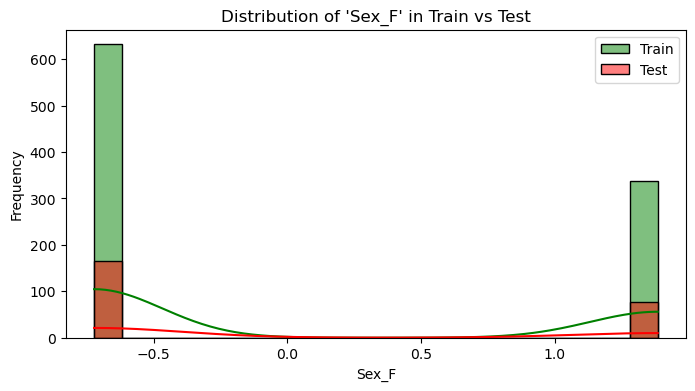

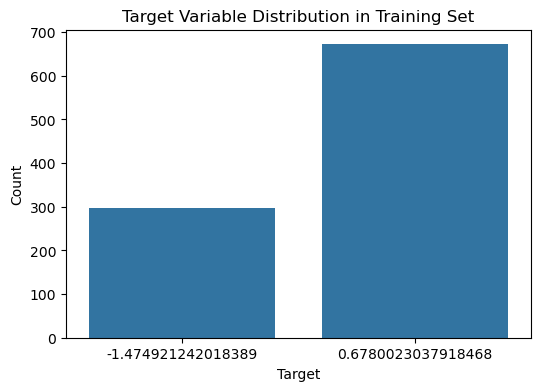

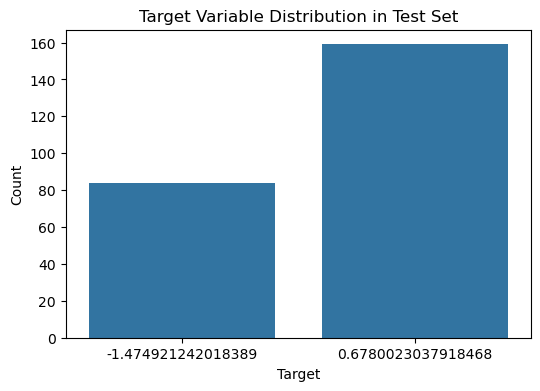

In [32]:
# Compare distribution of a numeric feature 'Sex_F'
if 'Sex_F' in X_train.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(X_train['Sex_F'], bins=20, color='green', kde=True, label='Train')
    sns.histplot(X_test['Sex_F'], bins=20, color='red', kde=True, label='Test', alpha=0.5)
    plt.title("Distribution of 'Sex_F' in Train vs Test")
    plt.xlabel("Sex_F")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Compare target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Target Variable Distribution in Training Set")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_test)
plt.title("Target Variable Distribution in Test Set")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


**Key Observations**

The distribution of ADHD diagnoses reveals an imbalance, with a higher prevalence of subjects diagnosed with ADHD.

Handedness and parental education level may exhibit a potential relationship with ADHD diagnosis.
